In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df = pd.read_csv("/Users/davidalexanderbehrens/Downloads/report.csv")

In [69]:
df_2015 = df[df.report_year==2015]

In [70]:
df_2015.reset_index(drop=True, inplace=True)

In [71]:
df.columns

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')

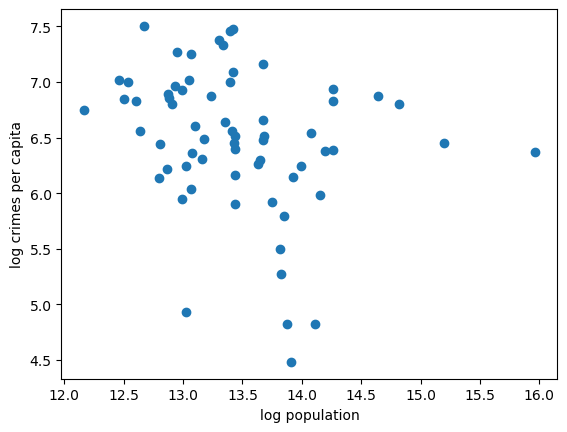

In [74]:
plt.scatter(np.log(df_2015.population), np.log(df_2015.crimes_percapita))
plt.xlabel("log population")
plt.ylabel("log crimes per capita")
plt.savefig("log_population_log_crimes_per_capita_scatter", transparent = True)

In [75]:
cl_data = np.log(df_2015[["population", "crimes_percapita"]])

In [76]:
cl_data

,population,crimes_percapita
0,13.235194,6.872998
1,12.867639,6.218819
2,13.049169,7.020745
3,12.794517,6.132986
4,13.752281,5.920318
...,...,...
64,12.903013,6.806354
65,13.023199,4.929064
66,13.418353,7.092216
67,12.873451,6.892439


In [77]:
x = cl_data.to_numpy()

In [78]:
delinx=[]
for i in range(len(x)):
    if np.isnan(x[i][0]) or np.isnan(x[i][1]):
        delinx.append(i)

In [79]:
delinx=np.array(delinx)
x=np.delete(x, delinx,0)

In [80]:
x

array([[13.23519372,  6.87299819],
       [12.86763886,  6.21881922],
       [13.04916883,  7.02074462],
       [12.79451743,  6.13298581],
       [13.75228105,  5.92031757],
       [13.33949208,  7.33689134],
       [13.40793021,  6.56073359],
       [12.46108689,  7.0198153 ],
       [13.68519342,  6.51854239],
       [14.81933403,  6.80665235],
       [12.60645151,  6.82982617],
       [13.65033516,  6.30311336],
       [14.07939444,  6.54273129],
       [13.43339765,  6.51312625],
       [13.41983488,  7.47283611],
       [13.43874515,  5.90421678],
       [13.912365  ,  4.48198509],
       [13.62885683,  6.26406471],
       [13.16319241,  6.31215214],
       [13.81481732,  5.4966353 ],
       [14.63758775,  6.87386752],
       [13.66895182,  7.16083038],
       [13.67309179,  6.47427642],
       [13.06763894,  7.25649482],
       [14.26156339,  6.82516683],
       [13.07384098,  6.36423427],
       [13.9216159 ,  6.14251041],
       [15.19244273,  6.45334149],
       [13.43065657,

In [81]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=5).fit(x)

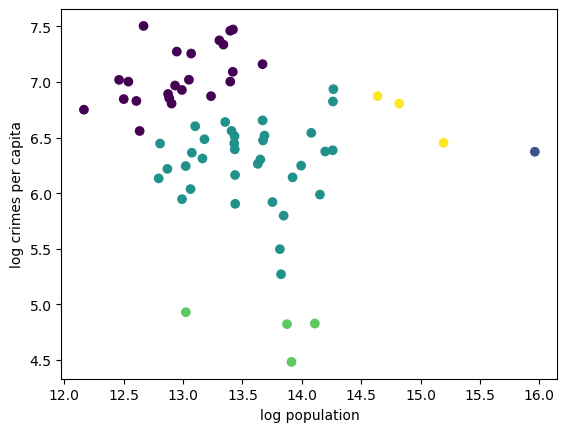

In [82]:
labels = sc.labels_

plt.scatter(x[:,0], x[:,1], c=labels)
plt.xlabel("log population")
plt.ylabel("log crimes per capita")
plt.savefig("log_population_log_crimes_per_capita_clustered", transparent = True)

plt.show()  
 